Dependency
***

In [138]:
import pandas as pd
import kaggle# to access kaggle
import pandas as pd
import scipy.stats as st
from pathlib import Path
import matplotlib.pyplot as plt
import csv
import zipfile# importing dependence for zipfile
from kaggle.api.kaggle_api_extended import KaggleApi


For API if need(not running now)
***

In [139]:
# this is for api use, but since data is already in resourse folder, this is not need.
#loading filess
# File to Load (Remember to Change These)
#api = KaggleApi()
#api.authenticate()
#downloading files
#api.dataset_download_file("umeradnaan/tourism-dataset",
 #                         file_name="tourism_dataset.csv")#path="./data 

#api.dataset_download_file("jessemostipak/hotel-booking-demand",
 #                         file_name="hotel_bookings.csv")


In [140]:
#this is for api use, but since data is already in resourse folder, this is not need.
#unziping file
#with zipfile.ZipFile("hotel_bookings.csv.zip", "r") as zipref:
    #zipref.extractall()


Reading Files
***

In [141]:
#reading files
hotel_data = Path("../Resources/hotel_bookings_dataset.csv")
travel_data = Path("../Resources/tourism_dataset.csv")
hotel_rating = Path("../Resources/hotel_ratings_bookings_APIdataset.csv")
hotel = pd.read_csv(hotel_data)
travel = pd.read_csv(travel_data)
rating =pd.read_csv(hotel_rating)
print(hotel.keys())
print(travel.keys())
print(rating.keys())


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')
Index(['Location', 'Country', 'Category', 'Visitors', 'Rating', 'Revenue',
       'Accommodation_Available'],
      dtype='object')
Index(['Country Name', 'Average Rating', 'Booking Frequency'], dtype='object')


Removing files
***

In [142]:
# Remove specified columns from the hotel_data DataFrame(code shared by Kathy Nguyen)
columns_to_remove = [
    'arrival_date_week_number', 'arrival_date_day_of_month', 'meal',
    'market_segment', 'distribution_channel', 'previous_bookings_not_canceled',
    'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type',
    'agent', 'company', 'days_in_waiting_list', 'customer_type',
    'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status_date', 'lead_time', 'is_repeated_guest', 'previous_cancellations'
]

hotel = hotel.drop(columns=columns_to_remove)
hotel.head()

,hotel,is_canceled,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,adr,reservation_status
0,Resort Hotel,0,2015,July,0,0,2,0.0,0,PRT,0.0,Check-Out
1,Resort Hotel,0,2015,July,0,0,2,0.0,0,PRT,0.0,Check-Out
2,Resort Hotel,0,2015,July,0,1,1,0.0,0,GBR,75.0,Check-Out
3,Resort Hotel,0,2015,July,0,1,1,0.0,0,GBR,75.0,Check-Out
4,Resort Hotel,0,2015,July,0,2,2,0.0,0,GBR,98.0,Check-Out


Calculating stay

In [143]:
#filtering out data for people that did not show up
hotel_clean= hotel.loc[(hotel["reservation_status"] != "Canceled"),:]
hotel_clean= hotel_clean.loc[(hotel_clean["reservation_status"] != "No-Show"),:]
hotel_clean.groupby("reservation_status").count()
hotel_clean

,hotel,is_canceled,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,adr,reservation_status
0,Resort Hotel,0,2015,July,0,0,2,0.0,0,PRT,0.00,Check-Out
1,Resort Hotel,0,2015,July,0,0,2,0.0,0,PRT,0.00,Check-Out
2,Resort Hotel,0,2015,July,0,1,1,0.0,0,GBR,75.00,Check-Out
3,Resort Hotel,0,2015,July,0,1,1,0.0,0,GBR,75.00,Check-Out
4,Resort Hotel,0,2015,July,0,2,2,0.0,0,GBR,98.00,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,2017,August,2,5,2,0.0,0,BEL,96.14,Check-Out
119386,City Hotel,0,2017,August,2,5,3,0.0,0,FRA,225.43,Check-Out
119387,City Hotel,0,2017,August,2,5,2,0.0,0,DEU,157.71,Check-Out
119388,City Hotel,0,2017,August,2,5,2,0.0,0,GBR,104.40,Check-Out


In [144]:
# Combine 'stays_in_weekend_nights' and 'stays_in_week_nights' into a new column 'total_stays_days'(code shared by Kathy Nguyen)
hotel_clean['total_stays_days'] = hotel_clean['stays_in_weekend_nights'] + hotel_clean['stays_in_week_nights']
hotel_clean = hotel_clean.drop(columns=['stays_in_weekend_nights', 'stays_in_week_nights'])
# Remove specified columns from the hotel_data DataFrame(code shared by Kathy Nguyen)
columns_to_remove = ["is_canceled"]
hotel_clean = hotel_clean.drop(columns=columns_to_remove)
# Display the updated hotel_data DataFrame
hotel_clean

,hotel,arrival_date_year,arrival_date_month,adults,children,babies,country,adr,reservation_status,total_stays_days
0,Resort Hotel,2015,July,2,0.0,0,PRT,0.00,Check-Out,0
1,Resort Hotel,2015,July,2,0.0,0,PRT,0.00,Check-Out,0
2,Resort Hotel,2015,July,1,0.0,0,GBR,75.00,Check-Out,1
3,Resort Hotel,2015,July,1,0.0,0,GBR,75.00,Check-Out,1
4,Resort Hotel,2015,July,2,0.0,0,GBR,98.00,Check-Out,2
...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,2017,August,2,0.0,0,BEL,96.14,Check-Out,7
119386,City Hotel,2017,August,3,0.0,0,FRA,225.43,Check-Out,7
119387,City Hotel,2017,August,2,0.0,0,DEU,157.71,Check-Out,7
119388,City Hotel,2017,August,2,0.0,0,GBR,104.40,Check-Out,7


In [145]:
#This is been commented out beause  I am assuming that visitor visited for a day any need a  place to rest for a small amount of ite.
#hotel_clean= hotel_clean.loc[(hotel_clean["total_stays_days"] > 0),:]

#hotel_clean
#len(hotel_clean["total_stays_days"])
#hotel_clean

In [146]:
# Change country as CN to CHN as both of them are China
hotel_clean['country'] = hotel_clean['country'].replace('CN', 'CHN')
hotel_clean

,hotel,arrival_date_year,arrival_date_month,adults,children,babies,country,adr,reservation_status,total_stays_days
0,Resort Hotel,2015,July,2,0.0,0,PRT,0.00,Check-Out,0
1,Resort Hotel,2015,July,2,0.0,0,PRT,0.00,Check-Out,0
2,Resort Hotel,2015,July,1,0.0,0,GBR,75.00,Check-Out,1
3,Resort Hotel,2015,July,1,0.0,0,GBR,75.00,Check-Out,1
4,Resort Hotel,2015,July,2,0.0,0,GBR,98.00,Check-Out,2
...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,2017,August,2,0.0,0,BEL,96.14,Check-Out,7
119386,City Hotel,2017,August,3,0.0,0,FRA,225.43,Check-Out,7
119387,City Hotel,2017,August,2,0.0,0,DEU,157.71,Check-Out,7
119388,City Hotel,2017,August,2,0.0,0,GBR,104.40,Check-Out,7


In [147]:
#convert abbreviation to country name in the hotel_data dataframe(code shared by Kathy Nguyen)
country_mapping = {
    'PRT': 'Portugal',
    'GBR': 'United Kingdom',
    'USA': 'United States',
    'ESP': 'Spain',
    'IRL': 'Ireland',
    'FRA': 'France',
    'ROU': 'Romania',
    'NOR': 'Norway',
    'OMN': 'Oman',
    'ARG': 'Argentina',
    'POL': 'Poland',
    'DEU': 'Germany',
    'BEL': 'Belgium',
    'CHE': 'Switzerland',
    'CN': 'China',
    'GRC': 'Greece',
    'ITA': 'Italy',
    'NLD': 'Netherlands',
    'DNK': 'Denmark',
    'RUS': 'Russia',
    'SWE': 'Sweden',
    'AUS': 'Australia',
    'EST': 'Estonia',
    'CZE': 'Czech Republic',
    'BRA': 'Brazil',
    'FIN': 'Finland',
    'MOZ': 'Mozambique',
    'BWA': 'Botswana',
    'LUX': 'Luxembourg',
    'SVN': 'Slovenia',
    'ALB': 'Albania',
    'IND': 'India',
    'CHN': 'China',
    'MEX': 'Mexico',
    'MAR': 'Morocco',
    'UKR': 'Ukraine',
    'SMR': 'San Marino',
    'LVA': 'Latvia',
    'PRI': 'Puerto Rico',
    'SRB': 'Serbia',
    'CHL': 'Chile',
    'AUT': 'Austria',
    'BLR': 'Belarus',
    'LTU': 'Lithuania',
    'TUR': 'Turkey',
    'ZAF': 'South Africa',
    'AGO': 'Angola',
    'ISR': 'Israel',
    'CYM': 'Cayman Islands',
    'ZMB': 'Zambia',
    'CPV': 'Cape Verde',
    'ZWE': 'Zimbabwe',
    'DZA': 'Algeria',
    'KOR': 'South Korea',
    'CRI': 'Costa Rica',
    'HUN': 'Hungary',
    'ARE': 'United Arab Emirates',
    'TUN': 'Tunisia',
    'JAM': 'Jamaica',
    'HRV': 'Croatia',
    'HKG': 'Hong Kong',
    'IRN': 'Iran',
    'GEO': 'Georgia',
    'AND': 'Andorra',
    'GIB': 'Gibraltar',
    'URY': 'Uruguay',
    'JEY': 'Jersey',
    'CAF': 'Central African Republic',
    'CYP': 'Cyprus',
    'COL': 'Colombia',
    'GGY': 'Guernsey',
    'KWT': 'Kuwait',
    'NGA': 'Nigeria',
    'MDV': 'Maldives',
    'VEN': 'Venezuela',
    'SVK': 'Slovakia',
    'FJI': 'Fiji',
    'KAZ': 'Kazakhstan',
    'PAK': 'Pakistan',
    'IDN': 'Indonesia',
    'LBN': 'Lebanon',
    'PHL': 'Philippines',
    'SEN': 'Senegal',
    'SYC': 'Seychelles',
    'AZE': 'Azerbaijan',
    'BHR': 'Bahrain',
    'NZL': 'New Zealand',
    'THA': 'Thailand',
    'DOM': 'Dominican Republic',
    'MKD': 'North Macedonia',
    'MYS': 'Malaysia',
    'ARM': 'Armenia',
    'JPN': 'Japan',
    'LKA': 'Sri Lanka',
    'CUB': 'Cuba',
    'CMR': 'Cameroon',
    'BIH': 'Bosnia and Herzegovina',
    'MUS': 'Mauritius',
    'COM': 'Comoros',
    'SUR': 'Suriname',
    'UGA': 'Uganda',
    'BGR': 'Bulgaria',
    'CIV': 'Ivory Coast',
    'JOR': 'Jordan',
    'SYR': 'Syria',
    'SGP': 'Singapore',
    'BDI': 'Burundi',
    'SAU': 'Saudi Arabia',
    'VNM': 'Vietnam',
    'PLW': 'Palau',
    'QAT': 'Qatar',
    'EGY': 'Egypt',
    'PER': 'Peru',
    'MLT': 'Malta',
    'MWI': 'Malawi',
    'ECU': 'Ecuador',
    'MDG': 'Madagascar',
    'ISL': 'Iceland',
    'UZB': 'Uzbekistan',
    'NPL': 'Nepal',
    'BHS': 'Bahamas',
    'MAC': 'Macau',
    'TGO': 'Togo',
    'TWN': 'Taiwan',
    'DJI': 'Djibouti',
    'STP': 'Sao Tome and Principe',
    'KNA': 'Saint Kitts and Nevis',
    'ETH': 'Ethiopia',
    'IRQ': 'Iraq',
    'HND': 'Honduras',
    'RWA': 'Rwanda',
    'KHM': 'Cambodia',
    'MCO': 'Monaco',
    'BGD': 'Bangladesh',
    'IMN': 'Isle of Man',
    'TJK': 'Tajikistan',
    'NIC': 'Nicaragua',
    'BEN': 'Benin',
    'VGB': 'British Virgin Islands',
    'TZA': 'Tanzania',
    'GAB': 'Gabon',
    'GHA': 'Ghana',
    'TMP': 'Timor-Leste',
    'GLP': 'Guadeloupe',
    'KEN': 'Kenya',
    'LIE': 'Liechtenstein',
    'GNB': 'Guinea-Bissau',
    'MNE': 'Montenegro',
    'UMI': 'United States Minor Outlying Islands',
    'MYT': 'Mayotte',
    'FRO': 'Faroe Islands',
    'MMR': 'Myanmar',
    'PAN': 'Panama',
    'BFA': 'Burkina Faso',
    'LBY': 'Libya',
    'MLI': 'Mali',
    'NAM': 'Namibia',
    'BOL': 'Bolivia',
    'PRY': 'Paraguay',
    'BRB': 'Barbados',
    'ABW': 'Aruba',
    'AIA': 'Anguilla',
    'SLV': 'El Salvador',
    'DMA': 'Dominica',
    'PYF': 'French Polynesia',
    'GUY': 'Guyana',
    'LCA': 'Saint Lucia',
    'ATA': 'Antarctica',
    'GTM': 'Guatemala',
    'ASM': 'American Samoa',
    'MRT': 'Mauritania',
    'NCL': 'New Caledonia',
    'KIR': 'Kiribati',
    'SDN': 'Sudan',
    'ATF': 'French Southern Territories',
    'SLE': 'Sierra Leone',
    'LAO': 'Laos',
}

# Replace initials with full country names
hotel_clean['country'] = hotel_clean['country'].replace(country_mapping)
hotel_clean.head()

,hotel,arrival_date_year,arrival_date_month,adults,children,babies,country,adr,reservation_status,total_stays_days
0,Resort Hotel,2015,July,2,0.0,0,Portugal,0.0,Check-Out,0
1,Resort Hotel,2015,July,2,0.0,0,Portugal,0.0,Check-Out,0
2,Resort Hotel,2015,July,1,0.0,0,United Kingdom,75.0,Check-Out,1
3,Resort Hotel,2015,July,1,0.0,0,United Kingdom,75.0,Check-Out,1
4,Resort Hotel,2015,July,2,0.0,0,United Kingdom,98.0,Check-Out,2


# Calculation and sorting


In [148]:
hotel_clean=hotel_clean.rename(columns={"arrival_date_year":"year", "arrival_date_month": "month", "adr":"average_rate", "total_stays_days": "days_stayed"})
hotel_clean['number_of_people'] = hotel_clean['adults'] + hotel_clean['children'] + hotel_clean["babies"]
hotel_clean.reset_index()

,index,hotel,year,month,adults,children,babies,country,average_rate,reservation_status,days_stayed,number_of_people
0,0,Resort Hotel,2015,July,2,0.0,0,Portugal,0.00,Check-Out,0,2.0
1,1,Resort Hotel,2015,July,2,0.0,0,Portugal,0.00,Check-Out,0,2.0
2,2,Resort Hotel,2015,July,1,0.0,0,United Kingdom,75.00,Check-Out,1,1.0
3,3,Resort Hotel,2015,July,1,0.0,0,United Kingdom,75.00,Check-Out,1,1.0
4,4,Resort Hotel,2015,July,2,0.0,0,United Kingdom,98.00,Check-Out,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
75161,119385,City Hotel,2017,August,2,0.0,0,Belgium,96.14,Check-Out,7,2.0
75162,119386,City Hotel,2017,August,3,0.0,0,France,225.43,Check-Out,7,3.0
75163,119387,City Hotel,2017,August,2,0.0,0,Germany,157.71,Check-Out,7,2.0
75164,119388,City Hotel,2017,August,2,0.0,0,United Kingdom,104.40,Check-Out,7,2.0


In [149]:
hotel_clean

,hotel,year,month,adults,children,babies,country,average_rate,reservation_status,days_stayed,number_of_people
0,Resort Hotel,2015,July,2,0.0,0,Portugal,0.00,Check-Out,0,2.0
1,Resort Hotel,2015,July,2,0.0,0,Portugal,0.00,Check-Out,0,2.0
2,Resort Hotel,2015,July,1,0.0,0,United Kingdom,75.00,Check-Out,1,1.0
3,Resort Hotel,2015,July,1,0.0,0,United Kingdom,75.00,Check-Out,1,1.0
4,Resort Hotel,2015,July,2,0.0,0,United Kingdom,98.00,Check-Out,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,2017,August,2,0.0,0,Belgium,96.14,Check-Out,7,2.0
119386,City Hotel,2017,August,3,0.0,0,France,225.43,Check-Out,7,3.0
119387,City Hotel,2017,August,2,0.0,0,Germany,157.71,Check-Out,7,2.0
119388,City Hotel,2017,August,2,0.0,0,United Kingdom,104.40,Check-Out,7,2.0


In [150]:
data_summary_agg= hotel_clean.groupby("country").agg(
    number_of_people=("number_of_people", "sum"),
    averate_rate=("average_rate", "mean"),
    days_stayed = ("days_stayed", "mean")
).reset_index()
summary_2015 = hotel_clean[hotel_clean["year"]==2015]
summary_2015_agg=summary_2015.groupby("country").agg(
    number_of_people=("number_of_people", "sum"),
    averate_rate=("average_rate", "mean"),
    days_stayed = ("days_stayed", "mean")
).reset_index()

summary_2016 = hotel_clean[hotel_clean["year"]==2016]
summary_2016_agg=summary_2016.groupby("country").agg(
    number_of_people=("number_of_people", "sum"),
    averate_rate=("average_rate", "mean"),
    days_stayed = ("days_stayed", "mean")
).reset_index()

summary_2017 = hotel_clean[hotel_clean["year"]==2017]
summary_2017_agg=summary_2017.groupby("country").agg(
    number_of_people=("number_of_people", "sum"),
    averate_rate=("average_rate", "mean"),
    days_stayed = ("days_stayed", "mean")
).reset_index()

data_summary,summary_2015_agg,summary_2016_agg,summary_2017_agg


(            country  number_of_people  averate_rate  days_stayed
 0           Albania              18.0     79.024000     3.200000
 1           Algeria             136.0    109.396098     3.475610
 2    American Samoa               2.0     72.070000     1.000000
 3           Andorra               7.0    295.000000     4.500000
 4            Angola             284.0    112.056624     3.961783
 ..              ...               ...           ...          ...
 159      Uzbekistan               3.0     99.250000     1.000000
 160       Venezuela              28.0    103.857857     2.785714
 161         Vietnam              13.0    123.840000     2.666667
 162          Zambia               4.0     96.670000     6.000000
 163        Zimbabwe               4.0     45.965000     2.500000
 
 [164 rows x 4 columns],
            country  number_of_people  averate_rate  days_stayed
 0          Albania               4.0     86.445000     3.000000
 1          Algeria              32.0     91.596154

In [151]:
top_2015_2017 = data_summary_agg.sort_values(by="number_of_people", ascending=False).head(10)
top_10_2015 = summary_2015_agg.sort_values(by="number_of_people", ascending=False).head(10)#code shared by Anh Pham 
top_10_2016 = summary_2016_agg.sort_values(by="number_of_people", ascending=False).head(10)
top_10_2017 = summary_2017_agg.sort_values(by="number_of_people", ascending=False).head(10)
top_2015_2017,top_10_2015,top_10_2016,top_10_2017

(            country  number_of_people  averate_rate  days_stayed
 118        Portugal           37670.0     90.342738     2.508519
 156  United Kingdom           19258.0     90.467804     4.979434
 50           France           17299.0    105.750599     3.456550
 138           Spain           13213.0    110.304402     2.976686
 55          Germany           11659.0    101.259214     3.485582
 69          Ireland            5102.0     94.690995     5.267794
 71            Italy            4894.0    110.760123     3.180025
 18          Belgium            3855.0    111.477709     3.668094
 104     Netherlands            3374.0    105.010518     3.679091
 157   United States            3212.0    118.976667     2.639098,
            country  number_of_people  averate_rate  days_stayed
 67        Portugal           10378.0     88.053357     2.795808
 82           Spain            3648.0     91.338661     3.227778
 29          France            2481.0     85.508139     3.268760
 92  United K

#Merging data from hotel and travel dataset.

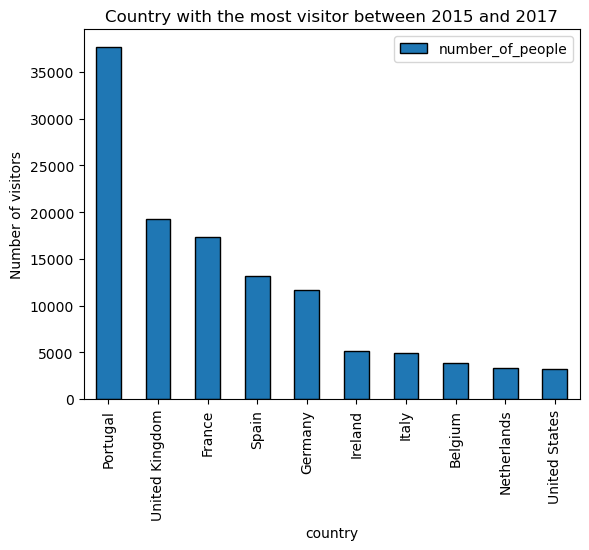

In [165]:
top_2015_2017.plot.bar(x="country",y="number_of_people", title= "Country with the most visitor between 2015 and 2017", ylabel= "Number of visitors", ec="black")

# Save the figure
plt.savefig("../Images/fig1_MS_top10_2015_2017", bbox_inches="tight")

plt.show()

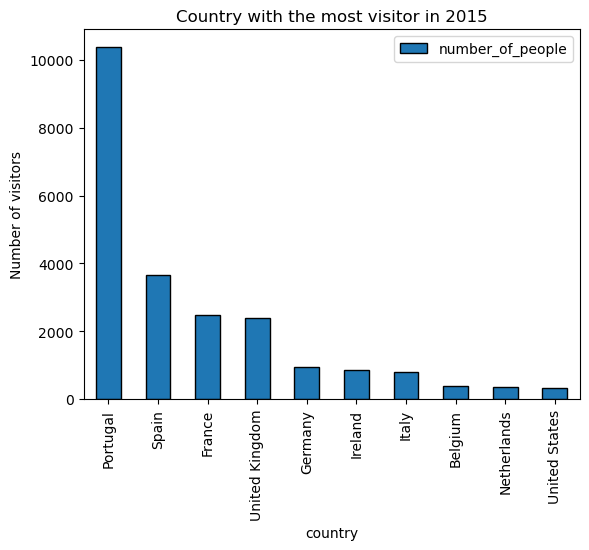

In [167]:

top_10_2015.plot.bar(x="country",y="number_of_people", title= "Country with the most visitor in 2015",ylabel= "Number of visitors",ec="black")

# Save the figure
plt.savefig("../Images/fig1_MS_top10_2015", bbox_inches="tight")
plt.show()

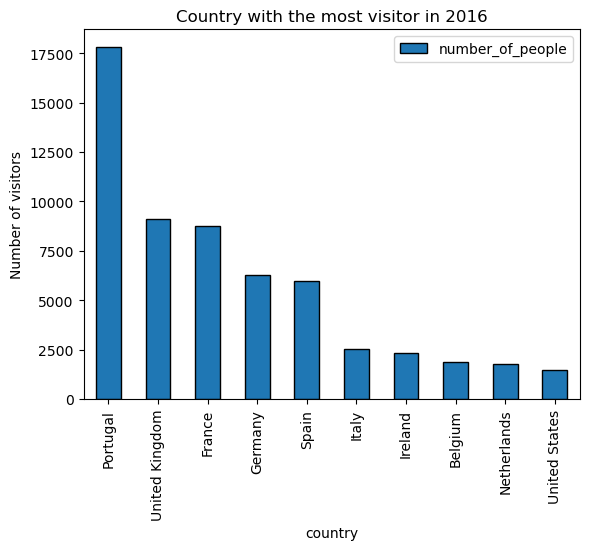

In [168]:
top_10_2016.plot.bar(x="country",y="number_of_people",title= "Country with the most visitor in 2016",ylabel= "Number of visitors",ec="black")

# Save the figure
plt.savefig("../Images/fig1_MS_top10_2016", bbox_inches="tight")
plt.show()


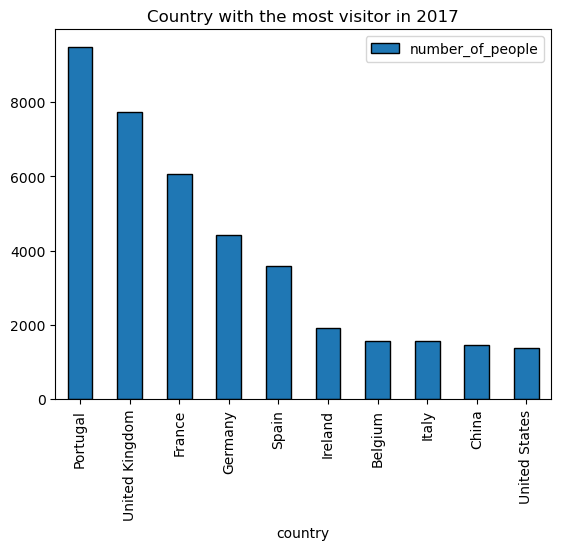

In [170]:

top_10_2017.plot.bar(x="country",y="number_of_people",title= "Country with the most visitor in 2017",ec="black")
# Save the figure
plt.savefig("../Images/fig1_MS_top10_2017", bbox_inches="tight")
plt.show()